<a href="https://colab.research.google.com/github/sid2901/ds_Assignment2/blob/main/ds_advancededa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# For scaling and encoding
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [4]:
# For modeling and metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
%matplotlib inline

In [8]:
# Part1 data loading and initial preprocessing
# Load the Netflix dataset from the attached file (update the file path if needed)
df = pd.read_csv("netflix_titles.csv")
# Clean the 'date_added' column: remove extra spaces and convert to datetime
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')
df = df.dropna(subset=['date_added'])  # Remove rows with invalid dates

# Extract the year when the content was added
df['year_added'] = df['date_added'].dt.year

# Display dataset info to verify data cleaning
print("Dataset Information:")
print(df.info())
print(df.head())

FileNotFoundError: [Errno 2] No such file or directory: '/netflix_titles.csv'

In [6]:
#part 2 advanced EDA
# Focus on movies for numerical analysis (assumes 'duration' for movies is in format "90 min")
movies = df[df['type'] == 'Movie'].copy()

# Extract numeric duration from the 'duration' column (e.g., "90 min")
movies['duration_num'] = movies['duration'].str.extract('(\d+)').astype(float)


NameError: name 'df' is not defined

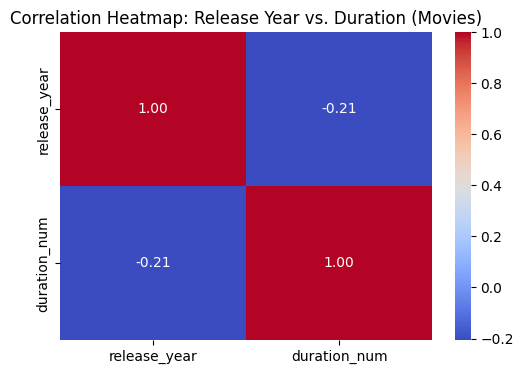

In [ ]:
# Create a correlation matrix for 'release_year' and 'duration_num'
corr_matrix = movies[['release_year', 'duration_num']].corr()

# Plot correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Release Year vs. Duration (Movies)")
plt.show()

In [ ]:
#Enhanced Visualizations: Distribution of Release Year & Duration
plt.figure(figsize=(12, 5))

# Subplot 1: Distribution of Release Years
plt.subplot(1, 2, 1)
sns.histplot(movies['release_year'], kde=True, color='skyblue')
plt.title("Distribution of Release Years")
plt.xlabel("Release Year")
plt.ylabel("Frequency")

# Subplot 2: Distribution of Movie Duration (minutes)
plt.subplot(1, 2, 2)
sns.histplot(movies['duration_num'], kde=True, color='salmon')
plt.title("Distribution of Movie Duration")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [1]:
#Scaling Numerical Features
scaler = StandardScaler()
movies['duration_scaled'] = scaler.fit_transform(movies[['duration_num']])

NameError: name 'StandardScaler' is not defined

In [ ]:
# One-hot encode the 'rating' column; drop the first category to avoid dummy variable trap
movies_encoded = pd.get_dummies(movies, columns=['rating'], drop_first=True)

In [ ]:
# Clip movie durations to a maximum of 300 minutes
movies['duration_clipped'] = movies['duration_num'].clip(upper=300)


In [ ]:
#  Data Preparation for Modeling
# Define features and target. Here we use 'release_year' and 'duration_scaled' as features.
features = ['release_year', 'duration_scaled']
target = 'duration_num'
from sklearn.impute import SimpleImputer

In [ ]:

# Split the data into training and testing sets (80/20 split)
X = movies[features]
y = movies[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Manually fill NaN values with the mean of each column in the training set
X_train = X_train.fillna(X_train.mean())  # Fill NaNs in X_train
X_test = X_test.fillna(X_train.mean())   # Fill NaNs in X_test using

In [ ]:

# Initialize an imputer for numerical features with a mean strategy
imputer = SimpleImputer(strategy='mean')

In [ ]:

# Fit the imputer on the training data and transform both training and test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [ ]:
# Ensure features and target are numeric (before fitting the model)
X_train = X_train.astype(np.float64)  # Convert X_train to float64
X_test = X_test.astype(np.float64)  # Convert X_test to float64
y_train = y_train.astype(np.float64)  # Convert y_train to float64

In [ ]:
y_train = y_train.dropna()  # Remove rows with NaN in y_train


In [ ]:
X_train = X_train.loc[y_train.index]  # Keep only rows in X_train with indices in y_train


In [ ]:
# Baseline Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


In [ ]:
# Evaluate the Linear Regression model
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print("Linear Regression Performance:")
print(f"R²: {r2_lr:.2f}, RMSE: {rmse_lr:.2f}, MAE: {mae_lr:.2f}")

In [ ]:
# Baseline Model 2: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest Regressor Performance:")
print(f"R²: {r2_rf:.2f}, RMSE: {rmse_rf:.2f}, MAE: {mae_rf:.2f}")

# Feature Importance Analysis (Random Forest)
feature_importances = pd.Series(rf_model.feature_importances_, index=features)
print("Random Forest Feature Importances:")
print(feature_importances.sort_values(ascending=False))


In [ ]:
# =============================================================================
# Extended Analytics: Additional Exploratory Data Analysis on Netflix Dataset
# =============================================================================

# -----------------------------------------------------------------------------
# 1. Distribution of Content Types by Country
# -----------------------------------------------------------------------------
# Count the number of movies and TV shows available by country.
# Since a title can be associated with multiple countries, we first split the 'country' column.
df ['country'] = df ['country'].fillna('Unknown')  # Replace missing countries with 'Unknown'
df ['country_list'] = df ['country'].str.split(', ')

# Explode the dataframe to have one country per row
df_exploded = df.explode('country_list')

# Group by country and type, then count titles
country_content = df_exploded.groupby(['country_list', 'type']).size().unstack(fill_value=0)

# Plot a bar chart for the top 10 countries by total number of titles
top_countries = country_content.sum(axis=1).nlargest(10).index
country_content_top = country_content.loc[top_countries]

country_content_top.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Paired')
plt.title("Distribution of Content Types by Top 10 Countries")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.legend(title="Content Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------
# Text Box (Extended Analytics):
# -----------------------------------------------------------------------------
# Here, we analyzed the distribution of content types (Movies vs. TV Shows) across the top 10 countries.
# This helps identify which regions have a more balanced or skewed mix of content, supporting strategic
# decisions in content acquisition and localization.

# -----------------------------------------------------------------------------
# 2. Rating Frequency Analysis
# -----------------------------------------------------------------------------
# Analyze the frequency distribution of ratings across the dataset.
# Replace missing ratings with 'Not Rated' for visualization purposes.
df['rating'] = df['rating'].fillna('Not Rated')
rating_counts = df['rating'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
plt.title("Frequency Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------
# Text Box (Extended Analytics):
# -----------------------------------------------------------------------------
# This bar chart shows how content is rated on Netflix. It highlights which ratings are most common,
# thereby offering insight into the audience the platform caters to (e.g., prevalence of mature content vs. family-friendly content).

# -----------------------------------------------------------------------------
# 3. Pairplot of Selected Features
# -----------------------------------------------------------------------------
# For deeper insight, we can create a pairplot to observe relationships among several numeric features.
# We use movies for this analysis, considering features such as 'release_year', 'duration_num', and 'year_added'.
# We'll add the scaled duration feature as well.
sns.pairplot(movies[['release_year', 'duration_num', 'year_added', 'duration_scaled']])
plt.suptitle("Pairplot of Selected Movie Features", y=1.02)
plt.show()

# -----------------------------------------------------------------------------
# Text Box (Extended Analytics):
# -----------------------------------------------------------------------------
# The pairplot visualizes pairwise relationships between key numerical features.
# It aids in detecting patterns or correlations that might not be evident from simple correlation matrices alone.

# -----------------------------------------------------------------------------
# 4. Temporal Trend by Content Type (Extended Analysis)
# -----------------------------------------------------------------------------
# Analyze the trend of content additions over time, broken down by both movies and TV shows.
# Group by year_added and type.
content_trend_all = df.groupby(['year_added', 'type']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
content_trend_all.plot(kind='line', marker='o', colormap='tab10', linewidth=2)
plt.title("Temporal Trend of Content Additions by Type")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.legend(title="Content Type")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------
# Text Box (Extended Analytics):
# -----------------------------------------------------------------------------
# This line plot provides a temporal analysis of content additions to Netflix,
# segmented by content type. It further supports the understanding of content expansion
# strategies over time and can be pivotal for forecasting future trends.

# =============================================================================
# End of Extended Analytics Section
# =============================================================================
